In [15]:
%pylab inline

import pandas as pd
import core

rcParams['axes.grid'] = True
rcParams['figure.figsize'] = (12,8)

Populating the interactive namespace from numpy and matplotlib


In [44]:
import pandas_datareader.data as web
df = web.DataReader(['SPY','IYR'], 'yahoo', '2000-01-02', '2020-01-02')['Adj Close']
df = df.dropna()

px = web.DataReader(['SPY','IYR'], 'yahoo', '2000-01-02', '2020-01-02')['Close']
px = px.dropna()

In [46]:
vols = pd.DataFrame()
vols['IYR'] = core.rolling_realized_vol(df.IYR,252)
vols['SPY'] = core.rolling_realized_vol(df.SPY,252)

correl = np.log(df/df.shift(1)).IYR.rolling(252).corr(np.log(df/df.shift(1)).SPY).iloc[252:]

In [47]:
logR = np.log(df/df.shift(1))

Text(0.5, 1.0, 'Px return since 2005')

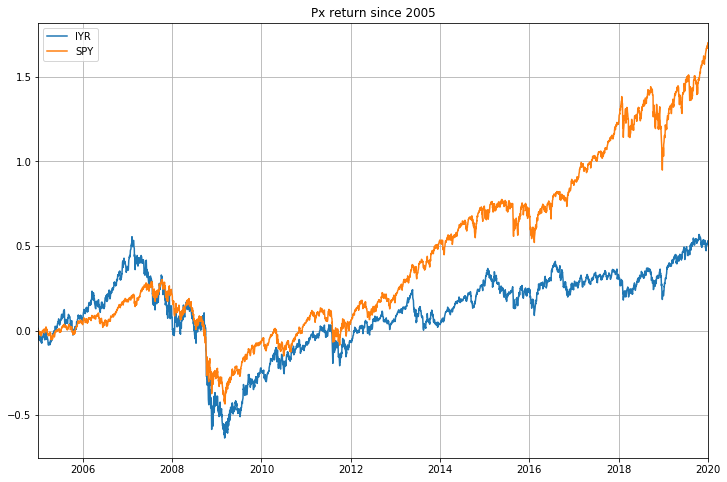

In [51]:
plot(px.IYR/px.IYR.loc['2005-01-03']-1,label='IYR')
plot(px.SPY/px.SPY.loc['2005-01-03']-1,label='SPY')
xlim('2005-01-03','2020-01-02')
legend(loc='upper left')
title('Px return since 2005')

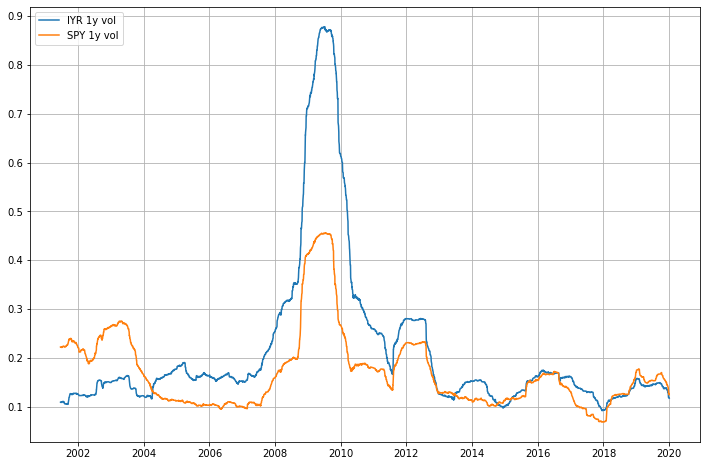

In [22]:
plot(vols.IYR,label='IYR 1y vol')
plot(vols.SPY,label='SPY 1y vol')
legend(loc='upper left')

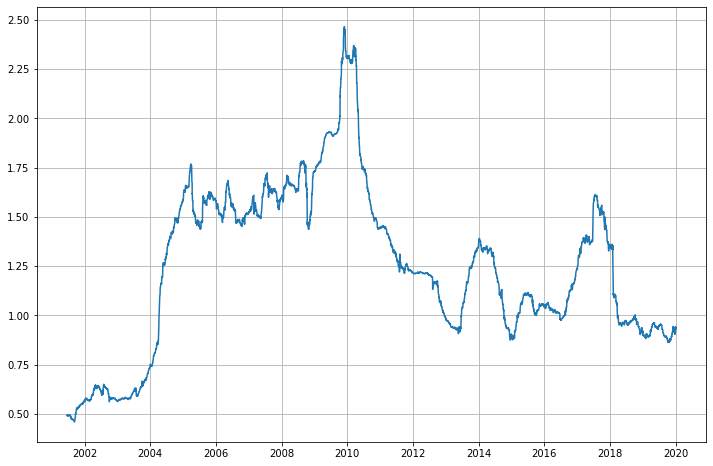

In [52]:
plot(vols.IYR/vols.SPY)

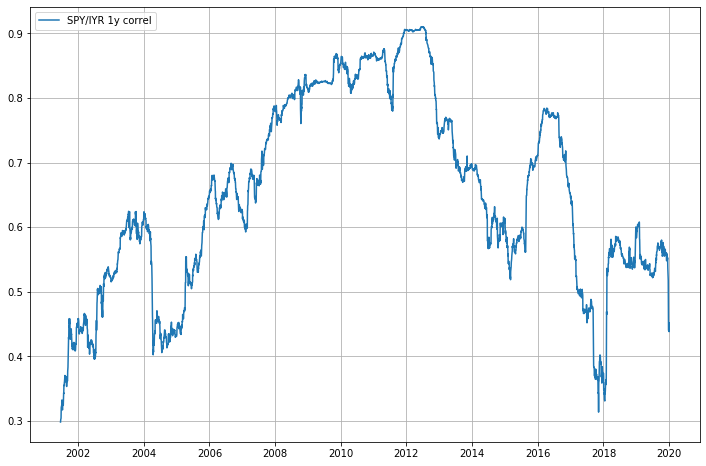

In [27]:
plot(correl,label='SPY/IYR 1y correl')
legend(loc='upper left')

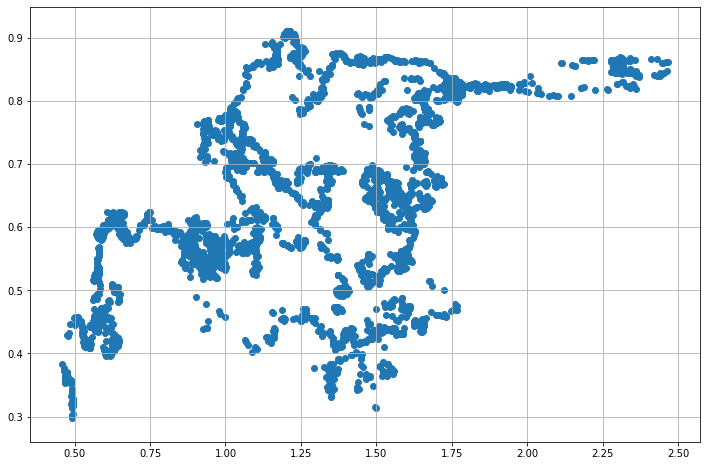

In [53]:
scatter(vols.IYR/vols.SPY,correl)